In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
data=pd.read_csv('Fish.csv')

In [6]:
# five elements from top
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
# any missing values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

c:\Users\gazmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


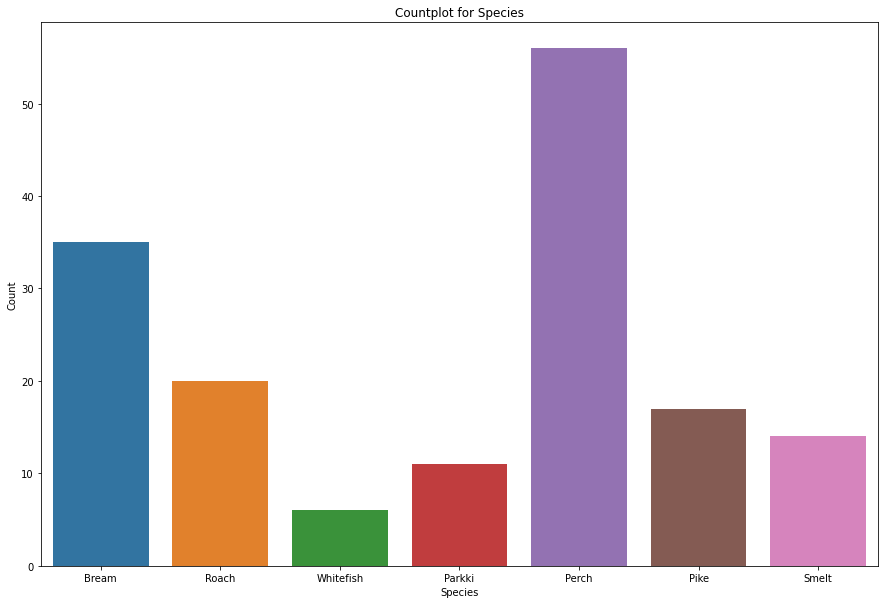

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data['Species'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Countplot for Species')
plt.show()

In [10]:
# creating the class numeric values
enc={'Bream':1,'Roach':2,'Whitefish':3,'Parkki':4,'Perch':5,'Pike':6,'Smelt':7}
data['Species']=data['Species'].map(enc)

In [23]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,7,12.2,11.5,12.2,13.4,2.0904,1.3936
155,7,13.4,11.7,12.4,13.5,2.4300,1.2690
156,7,12.2,12.1,13.0,13.8,2.2770,1.2558
157,7,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
y=data['Species']
x=data.drop('Species',axis=1)
print(y.shape,x.shape)

(159,) (159, 6)


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
col=list(x.columns)
x[col]=sc.fit_transform(x[col])
x.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


In [14]:
from sklearn.model_selection import train_test_split as tts,GridSearchCV
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=12)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(127, 6) (127,)
(32, 6) (32,)


In [42]:

from sklearn.linear_model import LogisticRegression
param1={'C':[100]}
m1=GridSearchCV(LogisticRegression(max_iter=1000),param1,n_jobs=-1)
m1.fit(xtrain,ytrain)
print("Best parameter for the Logistic Regression Model is: ",m1.best_params_)
ypred=m1.predict(xtest)
print("The accuracy score was found to be: ",accuracy_score(ytest,ypred)*100)
print("The confusion matrix of the model is:\n",confusion_matrix(ytest,ypred))

Best parameter for the Logistic Regression Model is:  {'C': 100}
The accuracy score was found to be:  100.0
The confusion matrix of the model is:
 [[ 8  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  2]]


In [43]:
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(m1, file)

In [44]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [100]})

In [45]:
xtest

,Weight,Length1,Length2,Length3,Height,Width
88,-0.751929,-0.626914,-0.600578,-0.667639,-0.669597,-0.531085
124,1.686065,1.360049,1.365240,1.207305,0.693192,1.701710
45,-0.667860,-0.576738,-0.553773,-0.512114,-0.453481,-0.355363
90,-0.807975,-0.626914,-0.600578,-0.667639,-0.807098,-0.251406
31,1.559962,0.878361,0.943993,1.103621,2.132841,1.115454
23,0.789331,0.557236,0.616357,0.809851,1.520723,1.019411
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
143,3.227325,2.985746,2.956616,2.831680,0.147215,1.027385
149,-1.088764,-1.560184,-1.611570,-1.626712,-1.612044,-1.868668
136,0.397011,1.390155,1.365240,1.259146,-0.277340,0.423753


In [46]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(xtest, ypred)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(xtest)  

Ypredict

Test score: 100.00 %


array([5, 5, 2, 5, 1, 1, 7, 6, 7, 6, 5, 5, 5, 2, 5, 5, 1, 1, 5, 6, 2, 5,
       4, 2, 1, 1, 4, 1, 5, 5, 4, 1], dtype=int64)

In [47]:
#def ValuePredictor(to_predict_list):
to_predict_list=[12.2,	11.5,	12.2,	13.4,	2.0904,	1.3936]

    #return result[0]

In [48]:
to_predict = np.array(to_predict_list).reshape(1, 6)
to_predict


array([[12.2   , 11.5   , 12.2   , 13.4   ,  2.0904,  1.3936]])

In [49]:
loaded_model = pickle.load(open("model.pkl", "rb"))


In [51]:
result = loaded_model.predict(to_predict)
result[0]

c:\Users\gazmi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


6